In [1]:
# Try different combinations of 6 predictors, pick the best 3 models with highest R-sq and lowest MSE
# Only output the 3 best models (predicted vs. ideal plot, MSE, R^2)
# Report any violations of validity

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
dataset = pd.read_csv("/Users/aimeexu/Desktop/dataset.csv")

In [62]:
dataset.head()

,Id,ActivityDate,TS,TD,LoggedActivitiesDistance,VAD,MAD,LAD,SedentaryActiveDistance,VAM,FAM,LAM,SM,Calories
0,1503960366,4/12/16,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/16,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/16,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/16,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/16,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [128]:
data = dataset.drop(['LoggedActivitiesDistance','SedentaryActiveDistance'], axis=1)
# they don't add much to the data since they are mainly 0s
data.head()

,Id,ActivityDate,TS,TD,VAD,MAD,LAD,VAM,FAM,LAM,SM,Calories
0,1503960366,4/12/16,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/16,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/16,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/16,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863


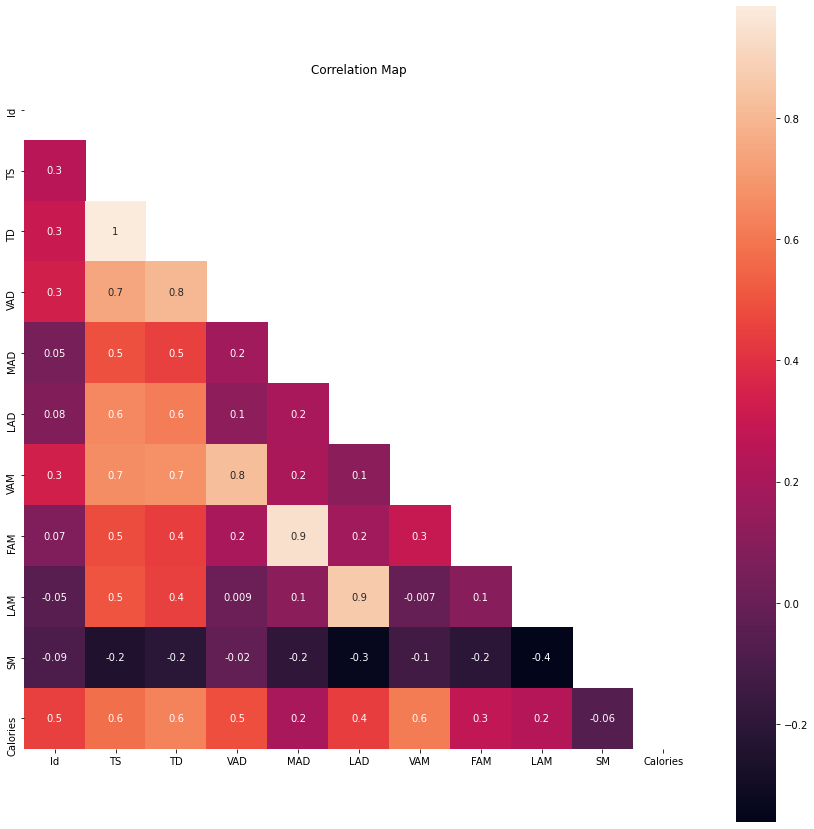

In [129]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(), annot=True, fmt='.1g', square=True, mask=matrix)
plt.title("Correlation Map")
plt.show()

In [17]:
train, test = train_test_split(data, test_size=0.2, random_state=42) # remember to use 42!!

print(f"Shape of full dataset is: {data.shape}")
print(f"Shape of training dataset is: {train.shape}")
print(f"Shape of test dataset is: {test.shape}")

Shape of full dataset is: (894, 12)
Shape of training dataset is: (715, 12)
Shape of test dataset is: (179, 12)


In [47]:
# MODEL 1: Most Highly Correlated Factors: FairlyActiveMinutes w/ ModeratelyActiveDistance, 
#LightlyActiveMinutes w/ LightyActiveDistance
# VeryActiveMinutes w/ VeryActiveDistance
X_train1 = train[['TD', 'TS', 'LAM', 'LAD', 'VAM', 'VAD', ]]
Y_train1 = train['Calories']

X_test1 = test[['TD', 'TS', 'LAM', 'LAD', 'VAM', 'VAD']]
Y_test1 = test['Calories']

In [48]:
#Performing Linear Regression
regression = LinearRegression()
regression.fit(X_train1, Y_train1)
Y_pred1 = regression.predict(X_test1)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1674.2819050653306
Coefficients: 
 [ 6.54138112e+02 -4.07548464e-01 -6.87990071e-02  4.33505386e+01
  1.99571043e+01 -2.67819820e+02]


In [49]:
# R^2 and MSE
r2_test = regression.score(X_test1, Y_test1)
r2_train = regression.score(X_train1, Y_train1)
mse_test = mean_squared_error(Y_pred1, Y_test1)
mse_train = mean_squared_error(Y_train1, regression.predict(X_train1))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 1.6503e+05
MSE of Train data = 1.2916e+05
R^2 of Test = 0.66234
R^2 of Train = 0.74963


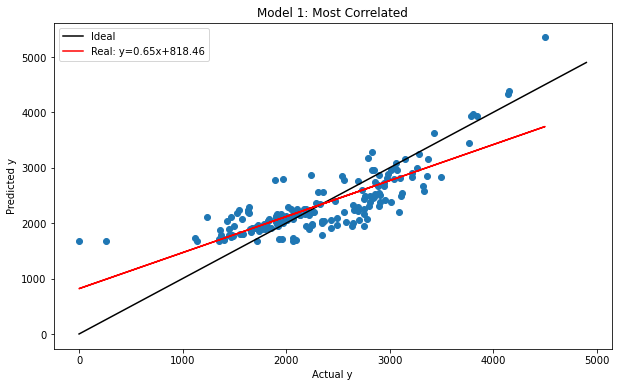

In [52]:
# Graphing Y_actual vs. Y_pred1
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test1, Y_pred1, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Model 1: Most Correlated")

# plotting the best fit line
m, b = np.polyfit(Y_test1, Y_pred1, 1)
ax.plot(Y_test1, m*Y_test1 + b, color='red', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# check validity
prediction = regression.predict(X_train1)
residual = Y_train1 - prediction
print(f'Mean of Residuals: {residual.mean()}') 

# the independent variables set 
X = data[['TD', 'TS', 'LAM', 'LAD', 'VAM', 'VAD']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)
# After running this Variance Inflation Factor test (I saw this in Belle's code, Thank you Belle!), 
# I noticed that some were really high; does that mean that some of these predictors should not be grouped together?
#I left these in because I wanted to generate the highest R^2

Mean of Residuals: -1.926793146168592e-12
  feature         VIF
0      TD  236.902962
1      TS  176.535787
2     LAM   20.579522
3     LAD   39.645317
4     VAM    5.201181
5     VAD   15.396955


In [106]:
# Model 2: Active Minutes
# Predictors: VAM, LAM, FAM, SM; Even though we were supposed to do 6 predictors, I wanted to
# isolate this data by itself
X_train2 = train[['VAM','LAM','FAM','SM','TD','VAD']]
Y_train2 = train['Calories']

X_test2 = test[['VAM','LAM','FAM','SM','TD','VAD']]
Y_test2 = test['Calories']

In [107]:
#Performing Linear Regression
regression = LinearRegression()
regression.fit(X_train2, Y_train2)
Y_pred2 = regression.predict(X_test2)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1232.5256864538687
Coefficients: 
 [  15.79290625   -1.42053995   -6.85651126    0.32748242  213.30853877
 -260.38043423]


In [108]:
# R^2 and MSE
r2_test = regression.score(X_test2, Y_test2)
r2_train = regression.score(X_train2, Y_train2)
mse_test = mean_squared_error(Y_pred2, Y_test2)
mse_train = mean_squared_error(Y_train2, regression.predict(X_train2))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 2.4852e+05
MSE of Train data = 2.1025e+05
R^2 of Test = 0.49151
R^2 of Train = 0.59244


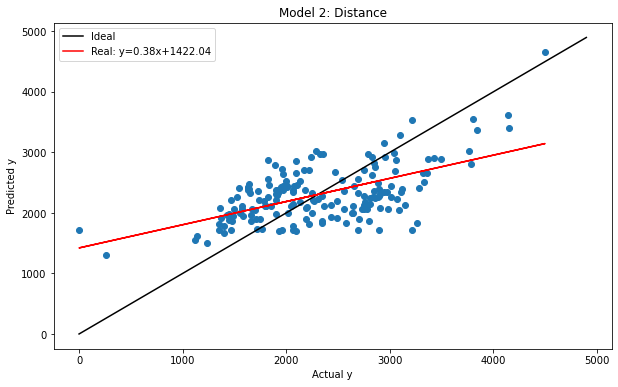

In [89]:
# Graphing Y_actual2 vs. Y_pred2
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test1, Y_pred1, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Model 2: Distance")

# plotting the best fit line
m, b = np.polyfit(Y_test1, Y_pred1, 1)
ax.plot(Y_test1, m*Y_test1 + b, color='red', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [104]:
# check validity
prediction = regression.predict(X_train2)
residual = Y_train2 - prediction
print(f'Mean of Residuals: {residual.mean()}') 

# the independent variables set 
X = data[['VAM','LAM','FAM','SM','TS','VAD']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

Mean of Residuals: -196494.20639934327
  feature        VIF
0     VAM   4.763050
1     LAM  13.576750
2     FAM   2.862511
3      SM   3.078437
4      TS  33.722303
5     VAD   9.268730


In [99]:
# Model 3: Active Distance
# Predictors: VAD, LAD, FAD, SD; Even though we were supposed to do 6 predictors, I wanted to
# isolate this data by itself before running regression with more predictors
X_train3 = train[['VAD','LAD','MAD','TD','VAM','FAM']]
Y_train3 = train['Calories']

X_test3 = test[['VAD','LAD','MAD','TD','VAM','FAM']]
Y_test3 = test['Calories']

In [100]:
#Performing Linear Regression
regression = LinearRegression()
regression.fit(X_train3, Y_train3)
Y_pred3 = regression.predict(X_test3)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1507.9114803857422
Coefficients: 
 [-242.49698666  -86.15063998 -503.69611216  233.97525152   12.17501505
   13.7222548 ]


In [102]:
# R^2 and MSE
r2_test = regression.score(X_test3, Y_test3)
r2_train = regression.score(X_train3, Y_train3)
mse_test = mean_squared_error(Y_pred3, Y_test3)
mse_train = mean_squared_error(Y_train3, regression.predict(X_train3))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 2.4037e+05
MSE of Train data = 2.1231e+05
R^2 of Test = 0.50819
R^2 of Train = 0.58846


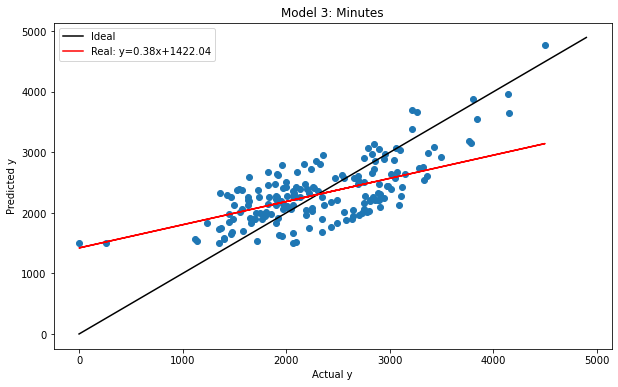

In [101]:
# Graphing Y_actual2 vs. Y_pred2
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test3, Y_pred3, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Model 3: Minutes")

# plotting the best fit line
m, b = np.polyfit(Y_test1, Y_pred1, 1)
ax.plot(Y_test1, m*Y_test1 + b, color='red', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [103]:
# check validity
prediction = regression.predict(X_train2)
residual = Y_train2 - prediction
print(f'Mean of Residuals: {residual.mean()}') 

# the independent variables set 
X = data[['VAD','LAD','MAD','TD','VAM','FAM']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

Mean of Residuals: -196494.20639934327
  feature         VIF
0     VAD   25.757629
1     LAD   36.724054
2     MAD   18.114975
3      TD  102.177145
4     VAM    5.494631
5     FAM   17.296106
